<a href="https://colab.research.google.com/github/jack-cao-623/python_learning/blob/main/effective_pandas_ch_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 14: Plotting with a Series
Skipped Chapter 12 and 13, which are about dates

In [16]:
# libraries needed
import numpy as np
import pandas as pd

# to display plots
%matplotlib inline

In [17]:
# get data
url = 'https://github.com/mattharrison/datasets/raw/master/data/alta-noaa-1980-2019.csv'
alta_df = pd.read_csv(url)

# view first 5 rows
alta_df.head(n = 5)

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DAPR,DASF,MDPR,MDSF,...,SNWD,TMAX,TMIN,TOBS,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-01,NaN,NaN,NaN,NaN,...,29.0,38.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-02,NaN,NaN,NaN,NaN,...,34.0,27.0,18.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-03,NaN,NaN,NaN,NaN,...,30.0,27.0,12.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-04,NaN,NaN,NaN,NaN,...,30.0,31.0,18.0,27.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00420072,"ALTA, UT US",40.5905,-111.6369,2660.9,1980-01-05,NaN,NaN,NaN,NaN,...,30.0,34.0,26.0,34.0,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# get dimensions of dataframe
print(alta_df.shape) # 14k rows, 22 columns

(14160, 22)


In [19]:
# column names in alta_df
print(alta_df.columns) # there are 22 columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'DASF', 'MDPR', 'MDSF', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS',
       'WT01', 'WT03', 'WT04', 'WT05', 'WT06', 'WT11'],
      dtype='object')


In [20]:
# convert DATE colun to datetime and as a series
dates = pd.to_datetime(alta_df['DATE'])   # double brackets doesn't work
print(dates)

0       1980-01-01
1       1980-01-02
2       1980-01-03
3       1980-01-04
4       1980-01-05
           ...    
14155   2019-09-03
14156   2019-09-04
14157   2019-09-05
14158   2019-09-06
14159   2019-09-07
Name: DATE, Length: 14160, dtype: datetime64[ns]


In [22]:
# pull out SNOW column as a series
snow = (
    alta_df['SNOW']
      .rename(dates)      # make index the dates
)

print(snow)  # so now, index is a date; on that date, how much snow there was

1980-01-01    2.0
1980-01-02    3.0
1980-01-03    1.0
1980-01-04    0.0
1980-01-05    0.0
             ... 
2019-09-03    0.0
2019-09-04    0.0
2019-09-05    0.0
2019-09-06    0.0
2019-09-07    0.0
Name: SNOW, Length: 14160, dtype: float64


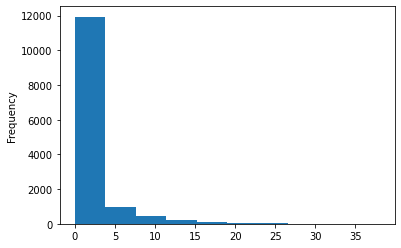

In [23]:
# plot a histogram of snow
snow.plot.hist()

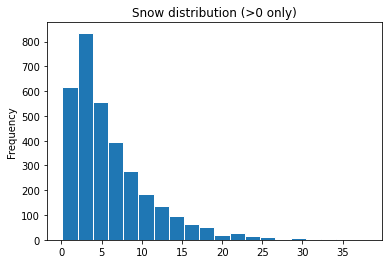

In [27]:
# only when there was some snow amount
snow[snow > 0].plot.hist(title = 'Snow distribution (>0 only)', bins = 20, edgecolor = 'white')

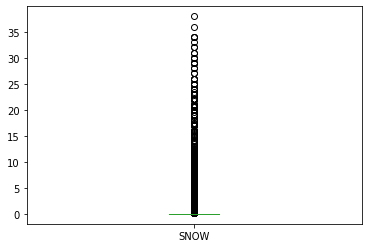

In [28]:
# boxplot
snow.plot.box()

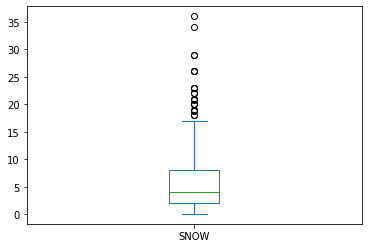

In [31]:
# boxplot for only month of January
(
    snow[(snow.index.month == 1) & (snow > 0)]    # filter to just January and days where there was snow
      .plot
      .box()
)


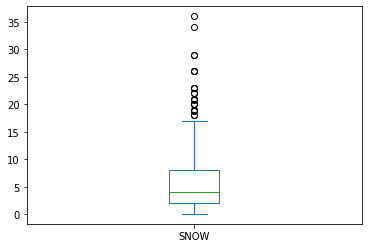

In [33]:
# above is equivalent to this:
(
    snow[lambda x: (x.index.month == 1) & (x > 0)]
      .plot
      .box()
)

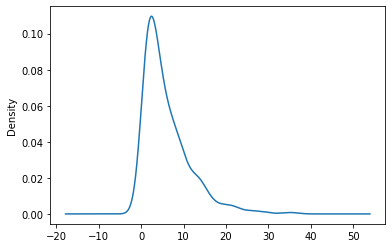

In [35]:
# kde: kernel density estimation
(
    snow[(snow > 0) & (snow.index.month == 1)]
      .plot
      .kde()
)

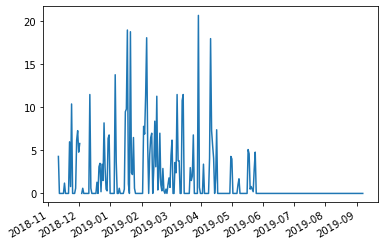

In [37]:
# line plot
(
    snow
      .iloc[-300:]  # last 300 in snow series
      .plot
      .line()
)

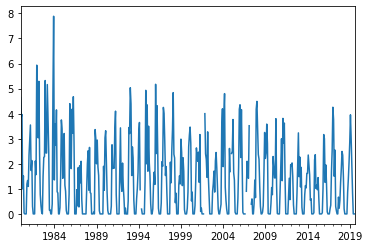

In [54]:
(
    snow
      .resample('M')   # group by month...
      .mean()          # average snowfall for each month
      .plot.line()
)

In [53]:
print(snow[:31].mean())   # average for first month
print(snow[31:60].mean()) # average for the second month

4.645161290322581
3.8793103448275863


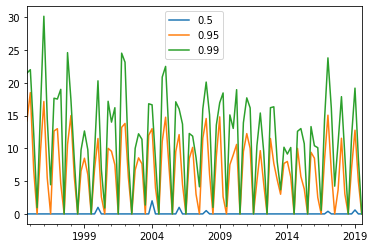

In [60]:
# 50th, 95th, and 99th percentile snowfall each quarter
(
    snow
      .resample('Q')                    # group by quarter
      .quantile([0.50, 0.95, 0.99])     # 50th, 95th, and 99th perceniles
      .unstack()                        # one row per quarter
      .iloc[-100:]                      # last 100 quarters
      .plot.line()                      # one line per quantile: 50th, 95th, 99th
)